In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('clean_dataset.csv', sep=',',index_col=0, header=0)
df.head()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
0,47.11,-122.57,12,11,81.71997,12.86919,0.886940,5,10.0,1010.6,722,0,0,0,1
1,47.11,-122.57,12,13,96.64917,9.66415,0.901270,0,10.0,1011.3,23,0,0,0,1
2,47.11,-122.57,12,13,93.61572,15.44983,1.497021,5,10.0,1011.6,32,0,0,0,1
3,47.11,-122.57,12,12,77.21558,10.36659,0.502979,5,2.0,1024.4,6,0,0,0,1
4,47.11,-122.57,12,14,54.80347,16.85471,1.883942,3,3.0,1023.7,9,0,0,0,1


### Input/Target Variable Split

In [4]:
X = df.drop(['PolyPwr'], axis=1)
X.shape

(21045, 14)

In [5]:
y = df['PolyPwr']
y.shape

(21045,)

# Baseline Regression Models

### Decision Tree Regression 

In [6]:
from sklearn.tree import DecisionTreeRegressor

kfoldcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
power_dt = DecisionTreeRegressor()
dt_scores = cross_val_score(power_dt, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 17s

In [7]:
dt_scores

array([0.31317305, 0.29616485, 0.32629113, 0.32860772, 0.33103677,
       0.39599964, 0.35305671, 0.31358957, 0.30638933, 0.28142008,
       0.27750216, 0.30955522, 0.30787216, 0.3544718 , 0.29217948,
       0.28819343, 0.36264479, 0.35599365, 0.31763987, 0.31663426,
       0.33508131, 0.32058203, 0.30609811, 0.25411402, 0.33067546,
       0.32433377, 0.3588053 , 0.28269884, 0.35073156, 0.32907328,
       0.38771642, 0.29552834, 0.26292906, 0.28218681, 0.29863945,
       0.34597678, 0.32725955, 0.32135628, 0.21336039, 0.34165923,
       0.32176538, 0.36609073, 0.30660808, 0.29834793, 0.3395127 ,
       0.28420336, 0.40541605, 0.219549  , 0.20475598, 0.35447744,
       0.39136191, 0.32492911, 0.31345857, 0.2959595 , 0.33861607,
       0.27462781, 0.31804557, 0.37581803, 0.2637729 , 0.29204455,
       0.34531529, 0.31198103, 0.37797843, 0.25170866, 0.32060701,
       0.29355154, 0.38126963, 0.27603413, 0.3364681 , 0.35762256,
       0.36664655, 0.27754789, 0.3022382 , 0.3277507 , 0.29737

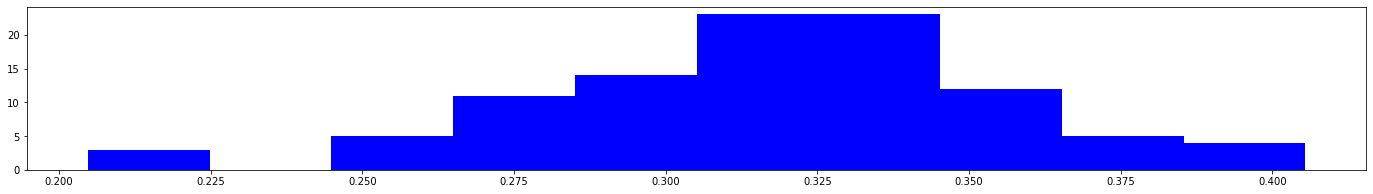

In [8]:
plt.figure(figsize=(24,3))
plt.hist(dt_scores, color='blue')
plt.show()

In [19]:
dt_meanscore = np.mean(dt_scores)

### Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor

power_rf = RandomForestRegressor()
rf_scores = cross_val_score(power_rf, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 19m 9s

In [10]:
rf_scores

array([0.63799286, 0.63877934, 0.64229928, 0.63713272, 0.68438162,
       0.66516719, 0.66290306, 0.6479341 , 0.64381528, 0.61965659,
       0.62452719, 0.65064622, 0.62591033, 0.65342853, 0.62525562,
       0.662832  , 0.65044401, 0.6696666 , 0.64547324, 0.64820079,
       0.65354221, 0.64022097, 0.65743947, 0.61860334, 0.65656049,
       0.65820575, 0.67526673, 0.62248834, 0.67853587, 0.6185326 ,
       0.65659726, 0.64531673, 0.63500108, 0.64500341, 0.62867848,
       0.65184757, 0.67144227, 0.66186489, 0.62451597, 0.64737289,
       0.64606128, 0.64629104, 0.6466135 , 0.66199707, 0.63723692,
       0.64072256, 0.67952133, 0.63169597, 0.61030828, 0.6674166 ,
       0.64934835, 0.63725389, 0.6498257 , 0.63978377, 0.68003858,
       0.640265  , 0.64870395, 0.65401595, 0.6235568 , 0.64110647,
       0.67150319, 0.65780781, 0.64527543, 0.63713499, 0.64470042,
       0.65218336, 0.65427785, 0.63520511, 0.63980228, 0.64872012,
       0.66192974, 0.62637679, 0.62660573, 0.6619016 , 0.63423

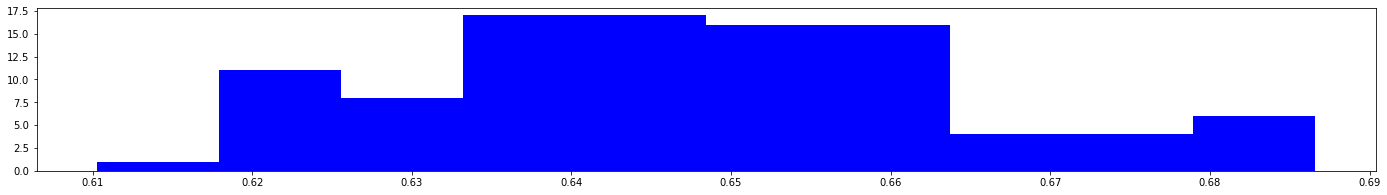

In [11]:
plt.figure(figsize=(24,3))
plt.hist(rf_scores, color='blue')
plt.show()

In [18]:
rf_meanscore = np.mean(rf_scores)

### Support Vector Regression

In [12]:
from sklearn.svm import SVR

power_svr = SVR()
svr_scores = cross_val_score(power_svr, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 49m 26s

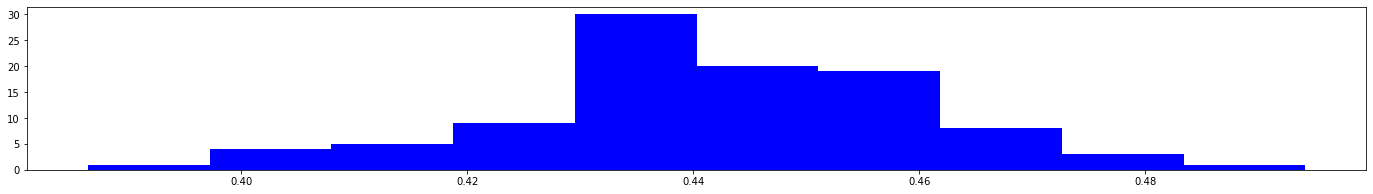

In [13]:
plt.figure(figsize=(24,3))
plt.hist(svr_scores, color='blue')
plt.show()

### K-Nearest Neighbors Regression 

In [14]:
from sklearn.neighbors import KNeighborsRegressor

power_knn = KNeighborsRegressor(11)
knn_scores = cross_val_score(power_knn, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 12s

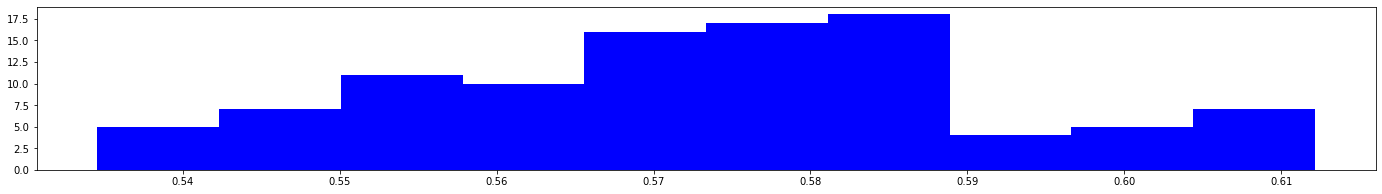

In [15]:
plt.figure(figsize=(24,3))
plt.hist(knn_scores, color='blue')
plt.show()

# Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [21]:
# Decision Tree
dtr_params = {'max_depth':np.arange(1,20), 'max_features':np.arange(1,15), 'min_samples_leaf':np.arange(5,100,5)}
hyp_dtr = GridSearchCV(dtr, param_grid=dtr_params, cv=5)
hyp_dtr.fit(X, y)
hyp_dtr.best_params_

# Runtime = 16m 28s

{'max_depth': 18, 'max_features': 11, 'min_samples_leaf': 85}

In [ ]:
# Random Forest
rfr_params = {'max_features':np.arange(1,15), 'min_samples_leaf':np.arange(5,100,5), 'n_estimators':[50,100,150,200]}
hyp_rfr = GridSearchCV(rfr, param_grid=rfr_params, cv=2)
hyp_rfr.fit(X, y)
hyp_rfr.best_params_

# Reduced cv from 5 to 2 due to time constraints. Model at first iteration took too long.
# Runtime = 

In [ ]:
# Support Vector
svr_params = {'C': [0.1, 1, 10, 100, 1000]}
hyp_svr = GridSearchCV(svr, param_grid=svr_params, cv=2)
hyp_svr.fit(X, y)
hyp_svr.best_params_

# Reduced cv from 5 to 2 due to time constraints. Model at first iteration took too long.
# Runtime =

In [ ]:
# KNN
knn_params = {'n_neighbors':np.arange(1, 50), 'p':[1,2], 'weights': ['uniform', 'distance']}
hyp_knn = GridSearchCV(knn, param_grid=knn_params, cv=5)
hyp_knn.fit(X, y)
hyp_knn.best_params_

# Runtime =

# New Model Iteration

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

kfoldcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
power_hpdt = DecisionTreeRegressor( )
hpdt_scores = cross_val_score(power_hpdt, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 

In [ ]:
hpdt_scores

In [ ]:
hpdt_meanscore = np.mean(hpdt_scores)

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

power_hprf = RandomForestRegressor( )
hprf_scores = cross_val_score(power_hprf, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 

In [ ]:
hprf_scores

In [ ]:
hprf_meanscore = np.mean(hprf_scores)

### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

power_hpsvr = SVR()
hpsvr_scores = cross_val_score(power_hpsvr, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 

In [ ]:
hpsvr_scores

In [ ]:
hpsvr_meanscore = np.mean(hpsvr_scores)

### K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

power_hpknn = KNeighborsRegressor(11)
hpknn_scores = cross_val_score(power_hpknn, X, y, scoring='r2', cv=kfoldcv)

# Runtime = 

In [ ]:
hpknn_scores

In [ ]:
hpknn_meanscore = np.mean(hpknn_scores)

### Comparison of Baseline Models and Tuned Models

In [ ]:
power_compare = pd.DataFrame({
    'Model':['Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression', 'KNN Regression'],
    'Baseline':[dt_meanscore, rf_meanscore, svr_meanscore, knn_meanscore],
    'Hyperparametric Tuned':[hpdt_meanscore, hprf_meanscore, hpsvr_meanscore, hpknn_meanscore]
})

# Prediction on test set with best performing model